**1. Data Exploration and Processing:**

In [ ]:
import pandas as pd



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aerofit_treadmill_data.csv to aerofit_treadmill_data.csv


In [ ]:
# Load the dataset
treadmill_data = pd.read_csv('aerofit_treadmill_data.csv')

In [ ]:
# Check the first few rows of the data
treadmill_data.head()

# Check the shape of the dataframe (rows, columns)
treadmill_data.shape

(180, 9)

In [ ]:
# Check data types
treadmill_data.dtypes

# Check for missing values
treadmill_data.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
treadmill_data.duplicated().sum()

0

**2. Statistical Summary:**

In [ ]:
# Statistical summary for numerical features
treadmill_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Statistical summary for categorical features
treadmill_data['Product'].value_counts()
treadmill_data['Gender'].value_counts()
treadmill_data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


**3. Non-Graphical Analysis:**

In [ ]:
# Value counts for each categorical feature
treadmill_data['Product'].value_counts()
treadmill_data['Gender'].value_counts()
treadmill_data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
# Check for unique values in categorical columns
treadmill_data['Product'].unique()
treadmill_data['Gender'].unique()
treadmill_data['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

**4. Graphical Analysis:**

*** Univariate Analysis - Numerical Features***

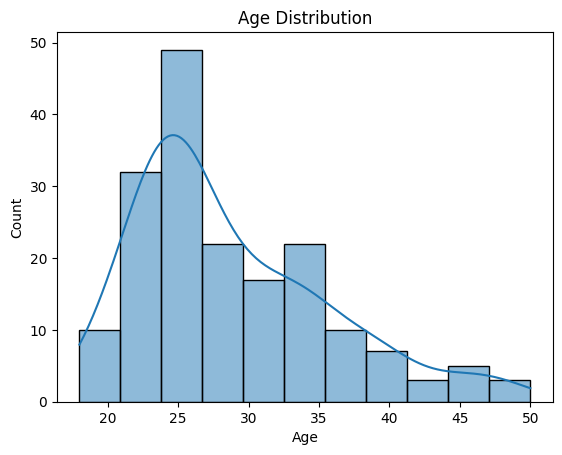

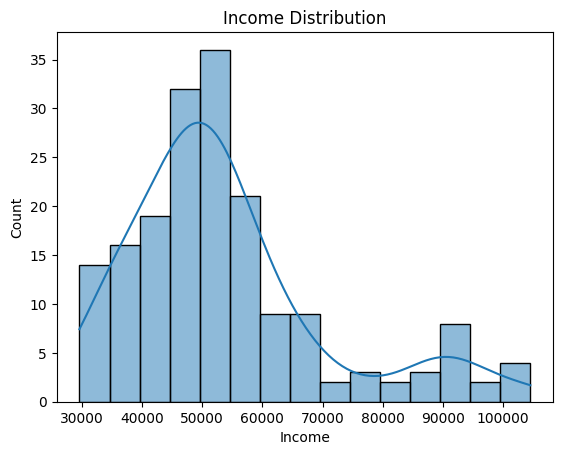

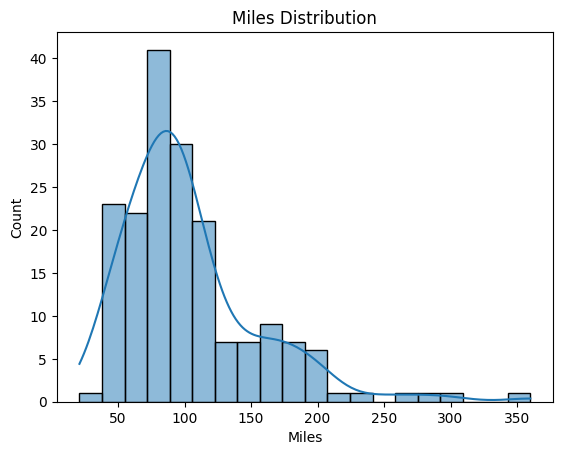

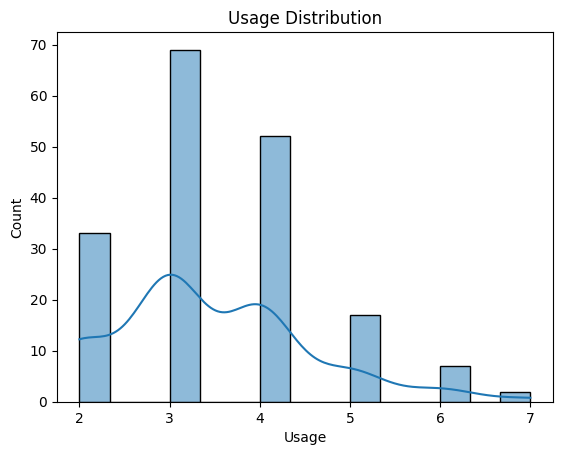

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for numerical features
sns.histplot(treadmill_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(treadmill_data['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

sns.histplot(treadmill_data['Miles'], kde=True)
plt.title('Miles Distribution')
plt.show()

sns.histplot(treadmill_data['Usage'], kde=True)
plt.title('Usage Distribution')
plt.show()

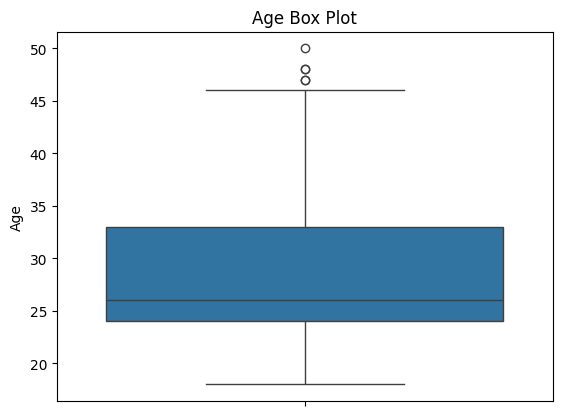

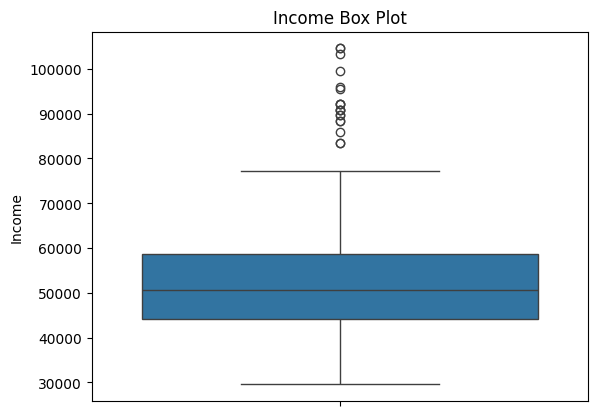

In [ ]:
# Box plot for numerical features
sns.boxplot(treadmill_data['Age'])
plt.title('Age Box Plot')
plt.show()

sns.boxplot(treadmill_data['Income'])
plt.title('Income Box Plot')
plt.show()

*** Univariate Analysis - Categorical Features***

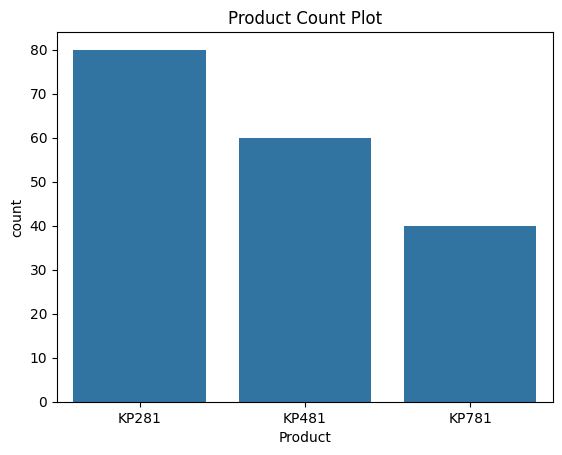

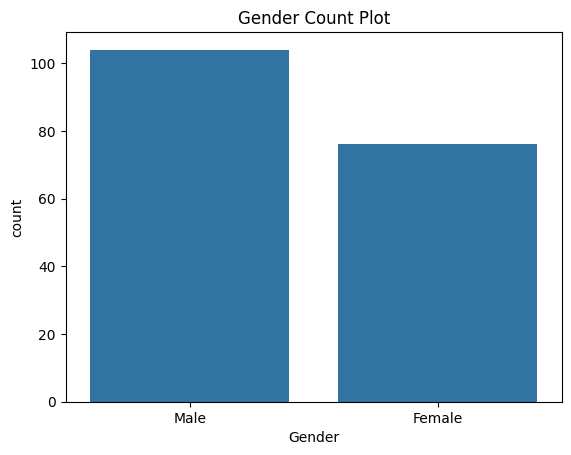

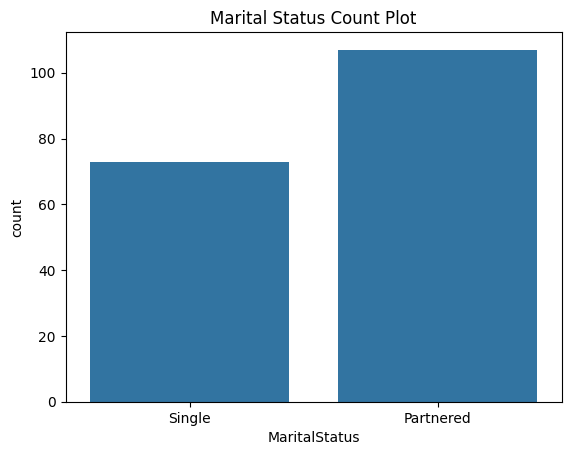

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('aerofit_treadmill_data.csv')

# Count plot for categorical features
sns.countplot(x='Product', data=data)
plt.title('Product Count Plot')
plt.show()

sns.countplot(x='Gender', data=data)
plt.title('Gender Count Plot')
plt.show()

sns.countplot(x='MaritalStatus', data=data)
plt.title('Marital Status Count Plot')
plt.show()

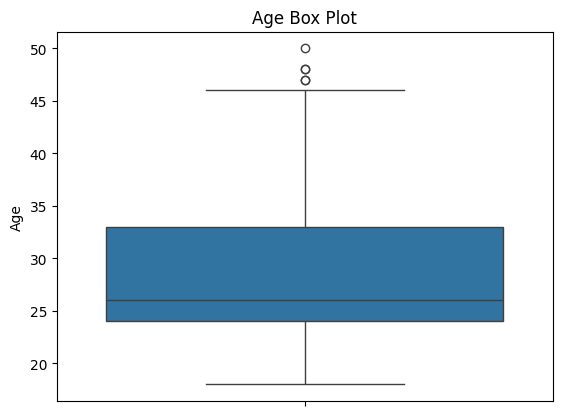

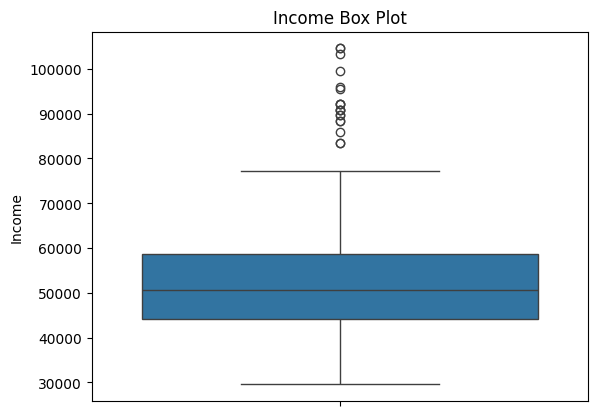

In [ ]:
# Box plot for numerical features
sns.boxplot(data['Age'])
plt.title('Age Box Plot')
plt.show()

sns.boxplot(data['Income'])
plt.title('Income Box Plot')
plt.show()

***Univariate Analysis - Categorical Features***

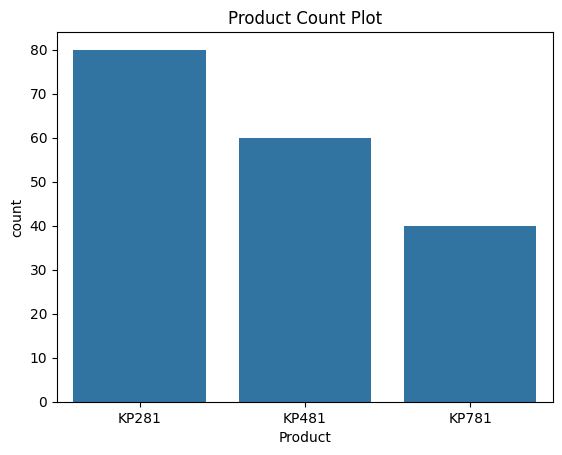

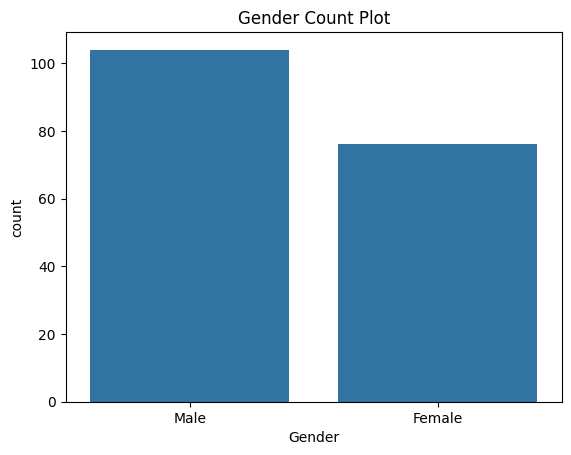

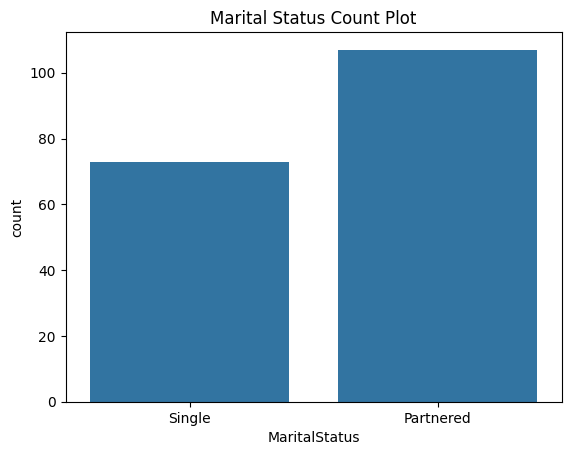

In [ ]:
# Count plot for categorical features
sns.countplot(x='Product', data=data)
plt.title('Product Count Plot')
plt.show()

sns.countplot(x='Gender', data=data)
plt.title('Gender Count Plot')
plt.show()

sns.countplot(x='MaritalStatus', data=data)
plt.title('Marital Status Count Plot')
plt.show()

Bivariate **Analysis**

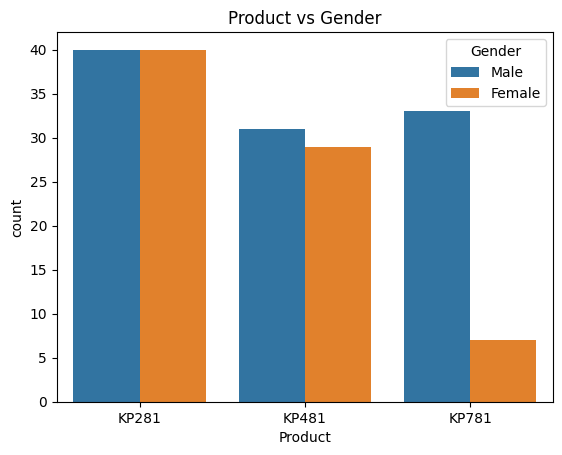

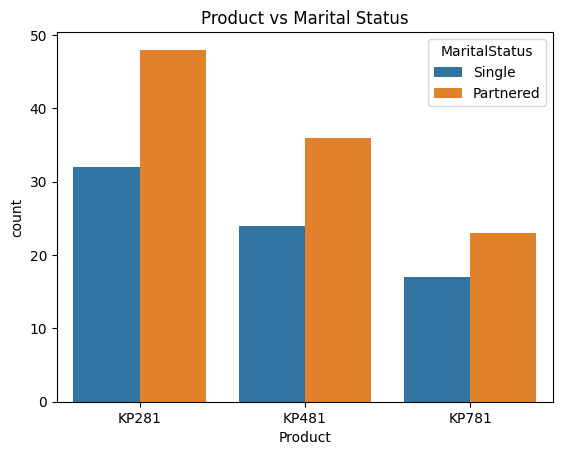

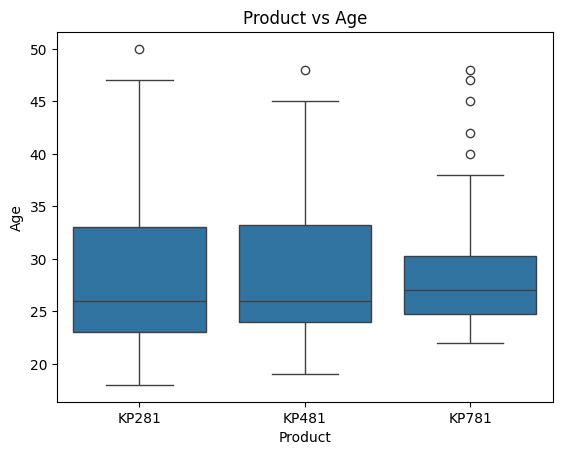

In [ ]:
# Product vs Gender
sns.countplot(x='Product', hue='Gender', data=data)
plt.title('Product vs Gender')
plt.show()

# Product vs Marital Status
sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.title('Product vs Marital Status')
plt.show()

# Product vs Age (using boxplot to compare age distributions across products)
sns.boxplot(x='Product', y='Age', data=data)
plt.title('Product vs Age')
plt.show()

# 5: Correlation **Analysis**

In [ ]:
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
correlation_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


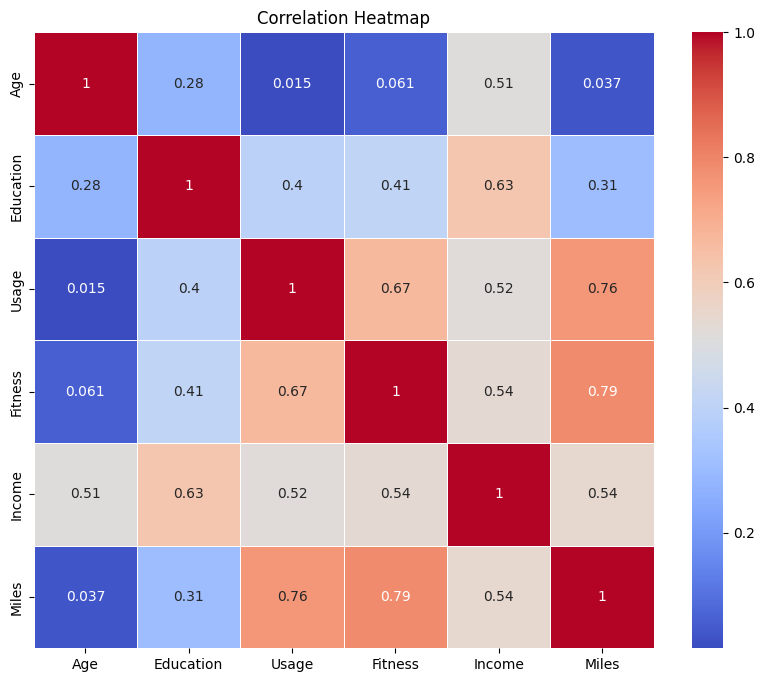

In [ ]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **6. Outlier Detection**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('aerofit_treadmill_data.csv')

# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detecting outliers in 'Income'
outliers_income = detect_outliers(data['Income'])

# Display detected outliers
outliers_income

,Income
159,83416
160,88396
161,90886
162,92131
164,88396
166,85906
167,90886
168,103336
169,99601
170,89641


In [ ]:
# Creating bins with intervals of $5000 between up to $35,000 and above $90,000
bins = [0, 35000, 45000, 50000, 60000, 70000, 90000, 120000]
labels = ['<35000', '35000-45000', '45000-50000', '50000-60000', '60000-70000', '70000-90000', '90000+']

# Using 'data' instead of 'df'
data['Income_Bins'] = pd.cut(data['Income'], bins=bins, labels=labels)

# Display the first few rows with the new 'Income_Bins' column
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,35000-45000


In [ ]:
# Creating bins with intervals of 50 for 'Miles' between up to 20 and above 150
bins = [0, 20, 50, 100, 150, float('inf')]
labels = ['<20', '20-50', '50-100', '100-150', '150+']

# Creating the 'Miles_Bins' column
data['Miles_Bins'] = pd.cut(data['Miles'], bins=bins, labels=labels)

# Display the first few rows with the new 'Miles_Bins' column
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Bins,Miles_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,35000-45000,20-50


# **Conditional Probabilities**

* Create frequency tables and calculate the percentage as follows *





In [ ]:
# Percentage of customers who purchased each product
product_distribution = data['Product'].value_counts(normalize=True) * 100
product_distribution

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


** Product – Gender**

In [ ]:
# Percentage of female customers purchasing KP781
female_kp781 = (data[(data['Gender'] == 'Female') & (data['Product'] == 'KP781')].shape[0] / data[data['Gender'] == 'Female'].shape[0]) * 100
female_kp781

9.210526315789473

In [ ]:
# Percentage of male and female customers purchasing each treadmill
gender_product_distribution = pd.crosstab(data['Gender'], data['Product'], normalize='index') * 100
gender_product_distribution

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769


In [ ]:
# Probability of a customer being female given that product is KP281
female_given_kp281 = (data[(data['Gender'] == 'Female') & (data['Product'] == 'KP281')].shape[0] / data[data['Product'] == 'KP281'].shape[0]) * 100
female_given_kp281

50.0

**Product vs Age**


In [ ]:
# Percentage of customers aged between 20 and 30 purchasing each treadmill
age_group = data[(data['Age'] >= 20) & (data['Age'] <= 30)]
age_product_distribution = pd.crosstab(age_group['Age'], age_group['Product'], normalize='index') * 100
age_product_distribution

Product,KP281,KP481,KP781
Age,,,
20,40.000000,60.000000,0.000000
21,57.142857,42.857143,0.000000
22,57.142857,0.000000,42.857143
23,44.444444,38.888889,16.666667
24,41.666667,25.000000,33.333333
25,28.000000,44.000000,28.000000
26,58.333333,25.000000,16.666667
27,42.857143,14.285714,42.857143
28,66.666667,0.000000,33.333333


**Product vs Income**

In [ ]:
# Percentage of low-income (<35000) and high-income (>90000) customers purchasing each treadmill
income_group = data[(data['Income'] < 35000) | (data['Income'] > 90000)]
income_product_distribution = pd.crosstab(income_group['Income_Bins'], income_group['Product'], normalize='index') * 100
income_product_distribution

Product,KP281,KP481,KP781
Income_Bins,,,
<35000,57.142857,42.857143,0.0
90000+,0.000000,0.000000,100.0


In [ ]:
# Percentage of high-income customers purchasing KP781
high_income_kp781 = (data[(data['Income'] > 90000) & (data['Product'] == 'KP781')].shape[0] / data[data['Income'] > 90000].shape[0]) * 100
high_income_kp781

100.0

In [ ]:
# Percentage of high-income customers buying treadmill given that product is KP781
high_income_given_kp781 = (data[(data['Income'] > 90000) & (data['Product'] == 'KP781')].shape[0] / data[data['Product'] == 'KP781'].shape[0]) * 100
high_income_given_kp781

30.0

** Product vs Fitness**

In [ ]:
# Percentage of customers with Fitness Level 5 purchasing each treadmill
fitness_product_distribution = pd.crosstab(data['Fitness'], data['Product'], normalize='index') * 100
fitness_product_distribution.loc[5]

,5
Product,
KP281,6.451613
KP481,0.000000
KP781,93.548387


In [ ]:
# Percentage of customers with fitness level 5 buying treadmill given that product is KP781
fitness_5_given_kp781 = (data[(data['Fitness'] == 5) & (data['Product'] == 'KP781')].shape[0] / data[data['Product'] == 'KP781'].shape[0]) * 100
fitness_5_given_kp781

72.5

In [ ]:
# Percentage of partnered customers using treadmills
partnered_customers = (data[data['MaritalStatus'] == 'Partnered'].shape[0] / data.shape[0]) * 100
partnered_customers

59.44444444444444